In [2]:
from archappl.data import epoch_to_iso, iso_to_epoch
import pickle
import numpy as np

In [3]:
with open('data.pkl', 'rb') as fp:
    data = pickle.load(fp)

In [4]:
id_arr = np.arange(len(data['results'][0]))

In [5]:
z = []
ts_arr = []
for idata, its in zip(data['results'], data['ts']):
    if idata and len(idata) == 70:
        z.append(idata)
        ts_arr.append(its)

z = np.asarray(z)
ts_arr = np.asarray(ts_arr)

In [6]:
x, y = np.meshgrid(id_arr, ts_arr)

In [17]:
import matplotlib.pyplot as plt
%matplotlib notebook

<IPython.core.display.Javascript object>


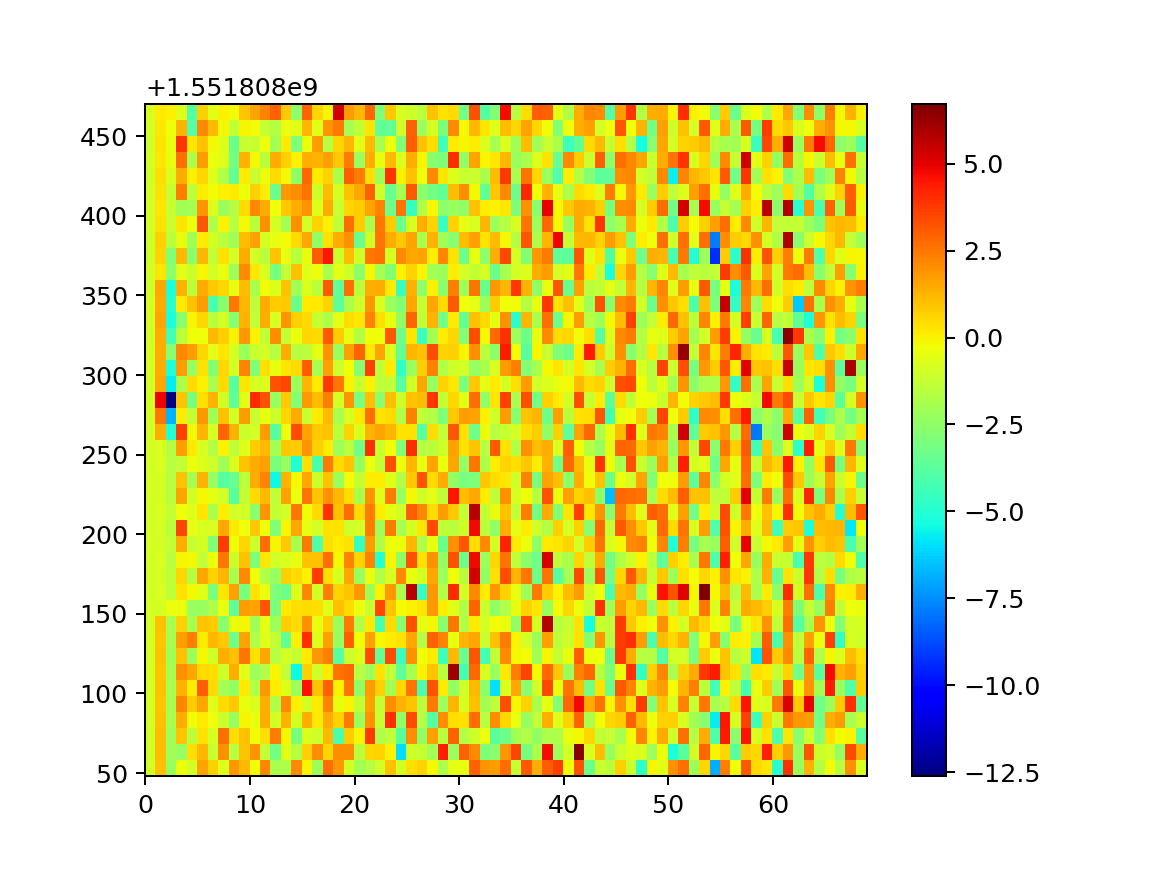

In [19]:
plt.pcolormesh(x, y, z, cmap='jet')
plt.colorbar()

In [23]:
from pandas import DataFrame

In [43]:
index = [epoch_to_iso(its, tz='-05:00') for its in ts_arr]

In [47]:
cols = ['PV{0:02d}'.format(i) for i in id_arr]

In [48]:
df = DataFrame(z, index=index, columns=cols)

<IPython.core.display.Javascript object>


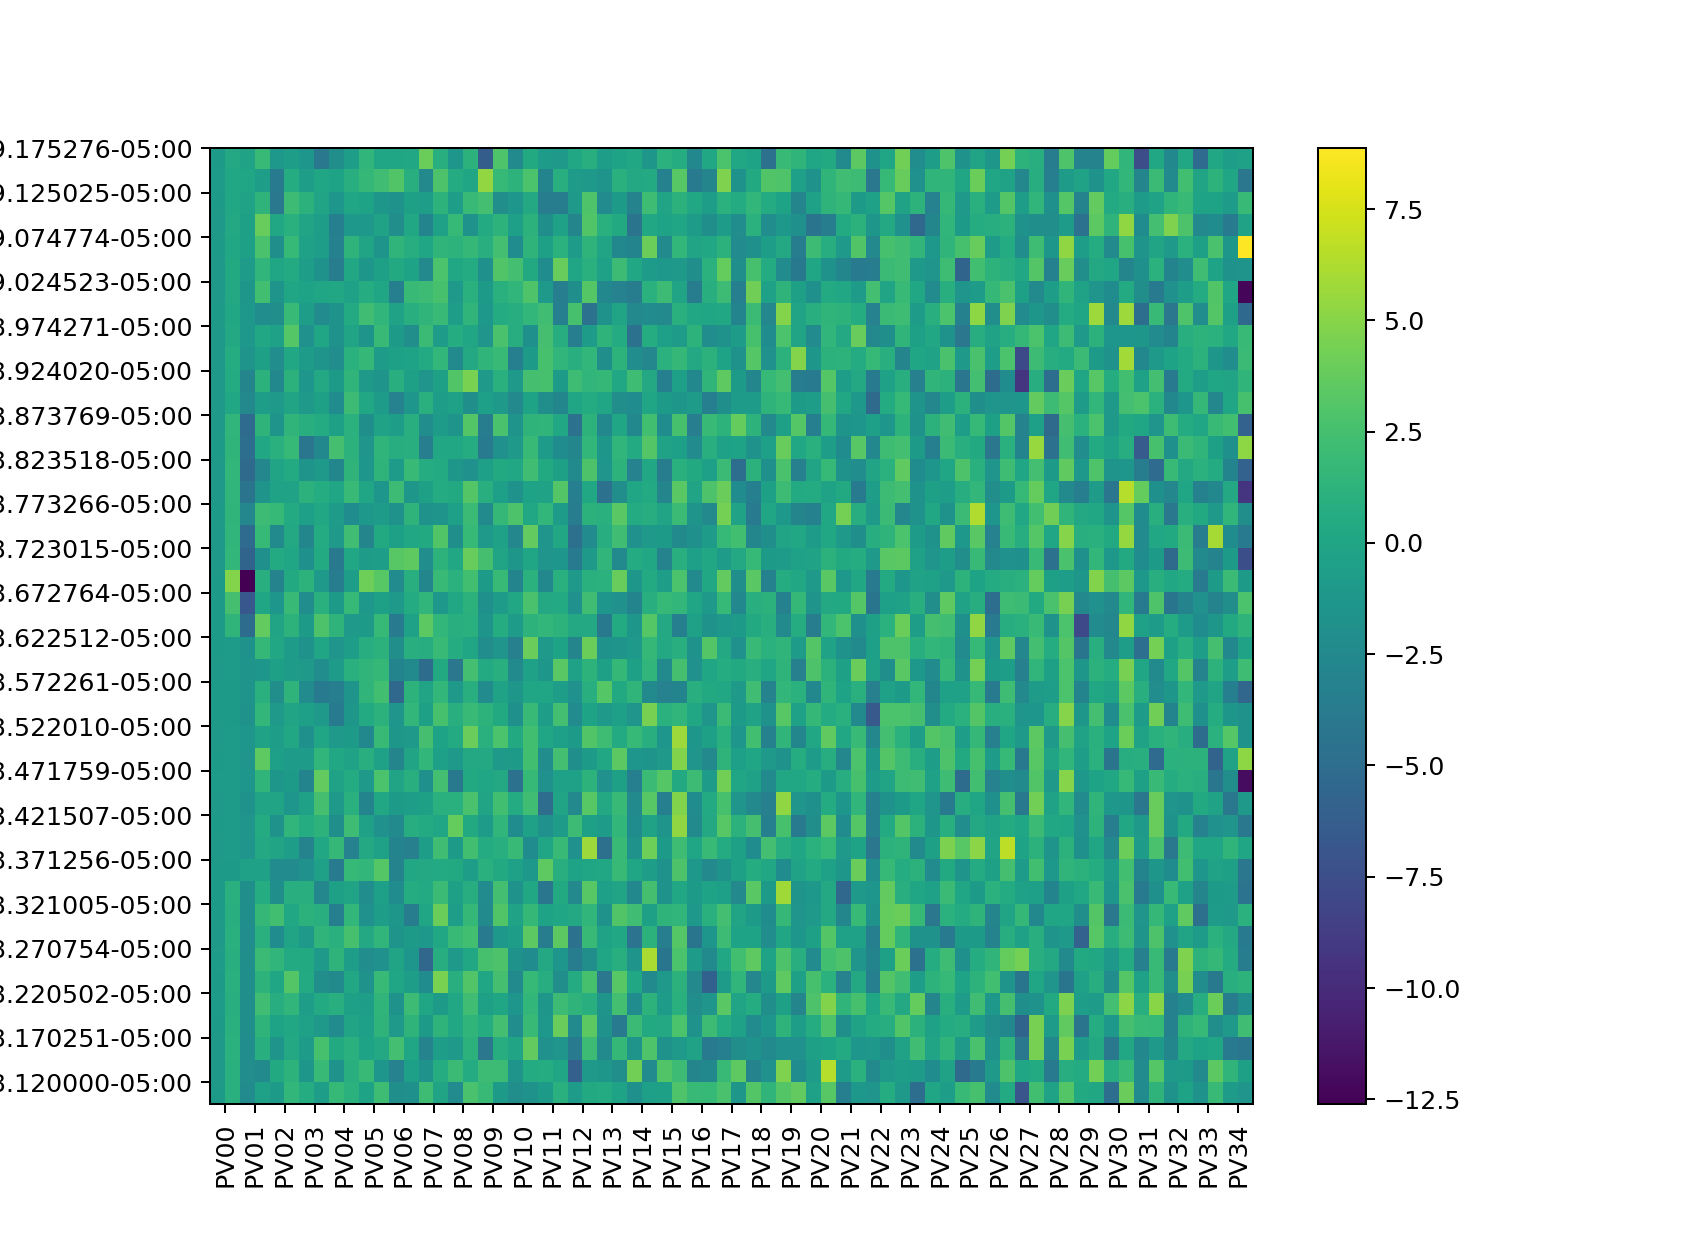

([<matplotlib.axis.XTick at 0x7fbbc1bf3f98>,
 <a list of 35 Text xticklabel objects>)

In [49]:
plt.imshow(df, origin='lower', aspect='auto')
plt.colorbar()
plt.yticks(np.arange(0.5, len(df.index), 2), df.index, rotation=0)
plt.xticks(np.arange(0.5, len(df.columns), 2), df.columns, rotation=90)